In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

The dataset was obtained from https://www.kaggle.com/crawford/80-cereals

Important abbreviations: 

**mfr: Manufacturer of cereal**
- A = American Home Food Products;
- G = General Mills
- K = Kelloggs
- N = Nabisco
- P = Post
- Q = Quaker Oats
- R = Ralston Purina

**type:**
- cold
- hot

In [2]:
cereal_orig = pd.read_csv('C:\Inna\'s files\data\cereal.csv', encoding='ISO-8859-1')
cereal_orig.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
#data had some dirt: negative values in the nutritional content. We clean it up:
cereal = cereal_orig.loc[(cereal_orig.protein >= 0) &(cereal_orig.fat >= 0) &(cereal_orig.sodium >= 0) &(cereal_orig.fiber >= 0)&(cereal_orig.carbo >= 0)&(cereal_orig.carbo >= 0)&(cereal_orig.sugars >=0) &(cereal_orig.potass >=0)&(cereal_orig.vitamins >=0)]

In [4]:
#normalize measurements
cereal['sugars_new'] = cereal['sugars'] / cereal['cups']

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Cereal Ratings')

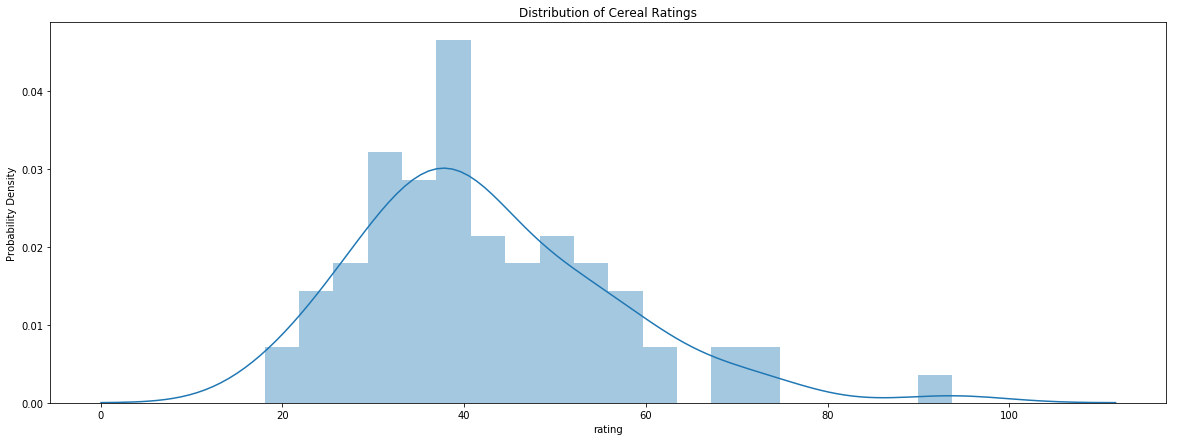

In [5]:
plt.figure(figsize=(20,7))
sns.distplot(cereal['rating'], bins =20)
plt.ylabel('Probability Density')
plt.title('Distribution of Cereal Ratings')

In [6]:
cereal['rating'].mean()

42.37178693243243

In [8]:
cereal['sugars_new'].median()

11.0

In [9]:
#sugar content above or below median
cereal['above_median'] = np.where (cereal['sugars_new'] >= 10.67, True,False)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


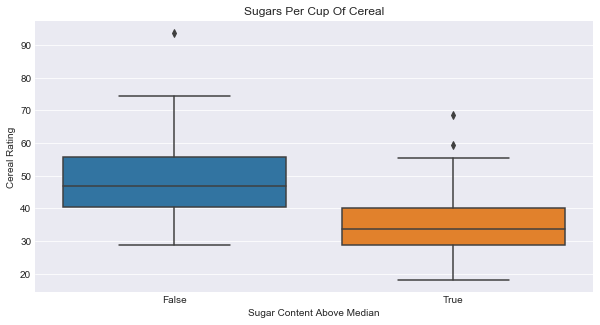

In [10]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

g = sns.boxplot(x='above_median', y='rating', data=cereal)
plt.title('Sugars Per Cup Of Cereal')
plt.ylabel('Cereal Rating')
plt.xlabel('Sugar Content Above Median')
plt.show()


<Figure size 720x360 with 0 Axes>

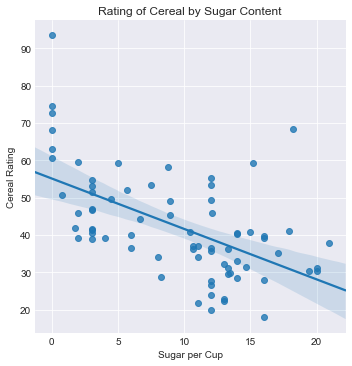

In [11]:
plt.figure(figsize=(10,5))
g = sns.lmplot(x='sugars_new',y= 'rating', data = cereal, fit_reg=True)
plt.xlabel('Sugar per Cup')
plt.ylabel('Cereal Rating')
plt.title('Rating of Cereal by Sugar Content')
plt.show()

In [12]:
cereal['rating'].corr(cereal['sugars_new'])

-0.5653917196730066

In [13]:
cereal[cereal.rating == np.amin(cereal.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_new,above_median
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851,16.0,True


# The Problem

*Cap'n'Crunch* cereal currently has the lowest rating among other cereal brands (rating of appr. 18.043). How can we increase the rating? Our preliminary analysis of cereal brands, their nutritional content, and ratings shows that there is a negative correlation between sugar content and cereal rating. 

The correlation is not causation: there is no guarantee that reducing sugar content of an existing cereal will result in higher ratings. There could be another explantion: cereal brands with zero sugar could possibly also be more expensive and higher quality. Therefore, it is necessary to conduct an experiment to see if reducing sugar content on an existing cereal (*Cap'n'Crunch*) would result in higher ratings.

# The Potential Solution

`One can hypothesize that reducing sugar content could help increase Cap'n'Crunch's rating.` Can we find out quantitatively if it is true or not?

# The Method of Testing the Solution

A new kind of cereal will be manufactured: with **zero sugar** content. How will we measure if it can be successful? We will have two groups: `the control group` will be given cereal with the original amount of sugar per cup (16 g) and `the test group` will be given the 0 sugar cereal. The variable of interest will be cereal rating on the scale from 0 to 100. Now let us examine how many participants will need for this study.

## Estimating The Sample Size

The formula we will use for the estimation of the n is:

$$se=\sqrt{\frac {s_1^2 } n_1 + \frac {s_2^2 } n_2}$$

Our best guess for the sample standard deviation is 14.034.

In [7]:
cereal['rating'].std()

14.03371248546657

Our updated formula (we assume that the standard deviation and number are the same for the control and test groups):

$$se=\sqrt{2 * \frac {s^2 } n}$$

$$ \sqrt{n} = \frac {\sqrt{2 *s^2 }}{se}$$

$$ n = \left(\frac {\sqrt{2 *s^2 }} {se}\right)^2 $$

For our experiment result to be statistically significant, we will need to have a `t-value of at least 3` (2-3: is the grey zone, under 2 is not statistically significant)

Our formula:

$$t-value=\frac{\bar y}{se}$$


$$ 3=\frac{\bar y}{se}$$

$$ se =\frac{\bar y}{3}$$

We don't know the difference in the means ($\bar y$) but we can estimate the size of the effect by closely examining our scatter plot *Rating of Cereal by Sugar Content*. The estimated rating for the sugar content of 16 g judging by our regression line would be approximately 35, whereas the estimated rating for the sugar content of 0 g would be approximately 57.

$$ se=\frac{57-35}{3}$$

$$ se \approxeq 7.33$$

$$ n \approxeq \left(\frac {\sqrt{2 *14.034^2 }} {7.33}\right)^2 $$

$$ n \approxeq 7.33 $$

Our minimum required number of participants (`n`) is approximately 7.33, we can round it up to `8`. Since it is a rather small number we can have 8 participants in each subroup. Both the control and test groups will have four age subgroups. Each of them will have 8 participants: 
 - under 10
 - 10-20
 - 20-40
 - 40 and above

Each age subgroup should have equal number of male and female participants (4 each). The total of `64 participants` will be necessary for the study. They will be recruited from the population to participate in the study in return for a $50 giftcard. Participants will be recruited in 8 different supermarkets located in divarious US cities and states.

First, A/A test will be performed: both the test group and the control group and asked to try the Cap'n'Crunch original cereal. They will be asked to rate it on the scale from 0 to 100. A/A test will be used to define a threshhold for the A/B test. 

If there are no bugs or problems, a subsequent A/B test will be performed, where the control group will be given cereal with the original amount of sugar per cup (16 g) and the test group will be given the 0 sugar cereal. The variable of interest will be cereal rating on the scale from 0 to 100. The test will be performed under the same conditions by the trained personnel with no interest in the outcome. Key metric will be the cereal rating.

If the difference in the ratings between the test group and the control group is statistically significant, we will introduce the new zero sugar line alongside the old line in 100 grocery stores and monitor the sales for each group for the next three months. We will compare the sales: if the difference in the sales for the zero sugar line is not statistically different, we will extend the timeframe for three extra months. If the difference in sales between the two groups is significant, we will make the zero sugar line an official product.